# Homework 4:

## Notebook by Creston Wilson 10/20/2017

## Created for CIS 399, Probability and Statistics for Computer Science

### References/Acknowledgement: Professor Lowd's code samples

### Part A:

In [1]:
# Import Statements
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

def sample_bernoulli(p):
    """ (float) -> int
    The function randomly returns 1 with a probability of p and randomly
    returns 0 otherwise. Takes a probability float as a parameter and 
    returns an integer.
    """
    # Random integer inside an array.
    ran_a = np.random.ranf(1)
     
    if (ran_a[0] <= p):
        return 1
    
    else:
        return 0

    
def sample_geometric(p):
    """ (float) -> int
    """
    # Represents the number of trials before success.
    nth_trial = 1
    
    # The implementation of our subroutine.
    while not sample_bernoulli(p):
        
        nth_trial += 1
    
    # Returns the number of trials undergone to obtain a success.
    return nth_trial



def sample_binomial(n, p):
    """ (int, float) -> int
    The function returns a random integer from a binomial distribution
    and takes parameters n (number of trials) and p (probability of 
    success). 
    """
    
    # Initialize the counter variables.
    k = 0
    nth_trial = 1
    
    # Loops through the bernoulli trials until number of n trials have bee
    # completed.
    while (nth_trial <= n):
        
        if sample_bernoulli(p):
            k += 1
            
        nth_trial += 1
    
    # Returns the number of successes achieved in n trials with probability of p.
    return k



def sample_negative_binomial(n, p):
    """ (int, float) -> int
    The function returns a random integer from a negative binomial 
    distribution with parameters n (# of trials) and p (probability of success).
    """

    # Initialize the counter variables.
    # k already accounts for the kth success.
    k = 1
    
    # Because the last trial is already accounted as a succes we start at
    # the second trial.
    nth_trial = 2
    
    
    while (nth_trial <= n):
        
        if sample_bernoulli(p):
            k += 1
        
        nth_trial += 1
    
    # Returns the number of successes achieved in n trials with a probability p and
    # also getting kth success on the nth trial.
    return k 



### Part B:

Binomial( 0.9 )
 Expected mean:    900.0
 Actual mean:      900.101
 Expected stddev:  9.48683298051
 Actual stddev:    9.75329682723
Binomial( 0.5 )
 Expected mean:    500.0
 Actual mean:      498.59
 Expected stddev:  15.8113883008
 Actual stddev:    15.7702853494
Binomial( 0.1 )
 Expected mean:    100.0
 Actual mean:      100.203
 Expected stddev:  9.48683298051
 Actual stddev:    9.46888541487
Binomial( 0.01 )
 Expected mean:    10.0
 Actual mean:      10.146
 Expected stddev:  3.14642654451
 Actual stddev:    3.13698645199


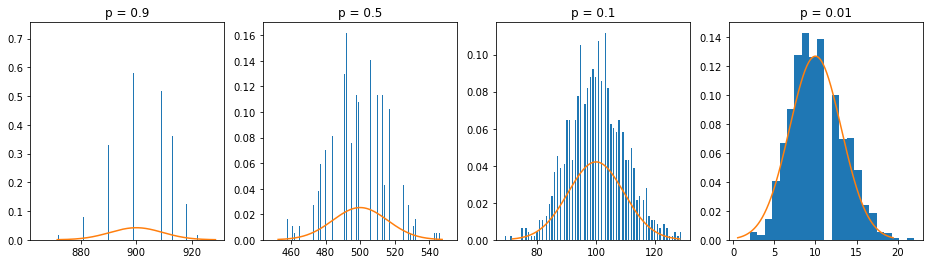

In [2]:
# Binomial(n, p) vs. Normal PDF

# Generate samples for Binomial function.

p = [0.9, 0.5, 0.1, 0.01]
n = 1000

fig, axes = plt.subplots(ncols=len(p), figsize=(16,4))

for p, ax in zip(p, axes):
    
    mean = n*p
    
    stddev = np.sqrt(mean*(1-p))
    
    samples = np.array([sample_binomial(n, p) for i in range(n)])
    
    print("Binomial(",p,")")
    print(" Expected mean:   ", mean)
    print(" Actual mean:     ", samples.mean())
    print(" Expected stddev: ", stddev)
    print(" Actual stddev:   ", samples.std())
    
    ax.hist(samples, bins=samples.max(), normed=True)
    
    x = np.linspace(mean - 3*stddev, mean + 3*stddev, num = 1000)
    ax.plot(x, st.norm.pdf(x, loc=mean, scale=stddev))
    
    ax.set_title("p = "+str(p))
    
plt.show()

For the each value of p, I randomly sampled data from the sampling_binomial function. Adjusting my n (# of trials) each time.

For p = 0.01, the samples become approximately normally distributed around n = 90.

For p = 0.1, the samples become approximately normally distributed around n = 90.

For p = 0.5, the samples become approximately normally distributed around n = 120.

For p = 0.9, the samples become approximately normally distributed around n = 120.

Negative Binomial( 0.9 )
 Expected mean:    900.0
 Actual mean:      899.692
 Expected stddev:  9.48683298051
 Actual stddev:    9.41483595184
Negative Binomial( 0.5 )
 Expected mean:    500.0
 Actual mean:      500.105
 Expected stddev:  15.8113883008
 Actual stddev:    15.372507115
Negative Binomial( 0.1 )
 Expected mean:    100.0
 Actual mean:      100.396
 Expected stddev:  9.48683298051
 Actual stddev:    9.29404024093
Negative Binomial( 0.01 )
 Expected mean:    10.0
 Actual mean:      10.937
 Expected stddev:  3.14642654451
 Actual stddev:    3.1098281303


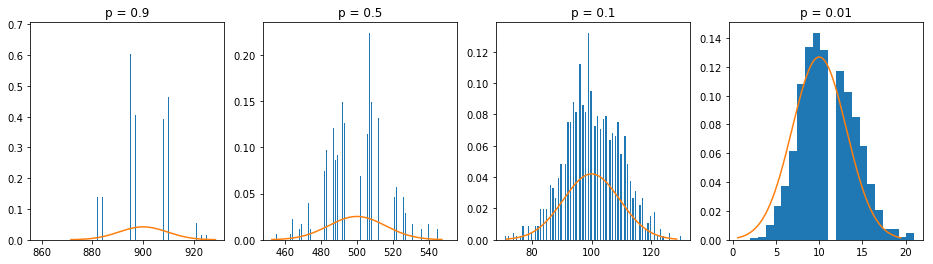

In [3]:
plt.clf()
# NegativeBinomial(n, p) vs. Normal PDF

# Generate samples for Binomial function.

p = [0.9, 0.5, 0.1, 0.01]
n = 1000

fig, axes = plt.subplots(ncols=len(p), figsize=(16,4))

for p, ax in zip(p, axes):
    
    mean = n*p
    
    stddev = np.sqrt(mean*(1-p))
    
    samples = np.array([sample_negative_binomial(n, p) for i in range(n)])
    
    print("Negative Binomial(",p,")")
    print(" Expected mean:   ", mean)
    print(" Actual mean:     ", samples.mean())
    print(" Expected stddev: ", stddev)
    print(" Actual stddev:   ", samples.std())
    
    ax.hist(samples, bins=samples.max(), normed=True)
    
    x = np.linspace(mean - 3*stddev, mean + 3*stddev, num = 1000)
    ax.plot(x, st.norm.pdf(x, loc=mean, scale=stddev))
    
    ax.set_title("p = "+str(p))
    
plt.show()

For the each value of p, I randomly sampled data from the sampling_negative_binomial function. Adjusting my n (# of trials) each time.

For p = 0.01, the samples become approximately normally distributed around n = 700.

For p = 0.1, the samples become approximately normally distributed around n = 180.

For p = 0.5, the samples become approximately normally distributed around n = 150.

For p = 0.9, the samples become approximately normally distributed around n = 30.

Geometric( 0.9 )
 Expected mean:    1.1111111111111112
 Actual mean:      1.103
 Expected stddev:  0.351364184463
 Actual stddev:    0.332251410832
Geometric( 0.5 )
 Expected mean:    2.0
 Actual mean:      2.015
 Expected stddev:  1.41421356237
 Actual stddev:    1.45628808963
Geometric( 0.1 )
 Expected mean:    10.0
 Actual mean:      10.022
 Expected stddev:  9.48683298051
 Actual stddev:    9.57922314178
Geometric( 0.01 )
 Expected mean:    100.0
 Actual mean:      103.9
 Expected stddev:  99.4987437107
 Actual stddev:    95.9586577647


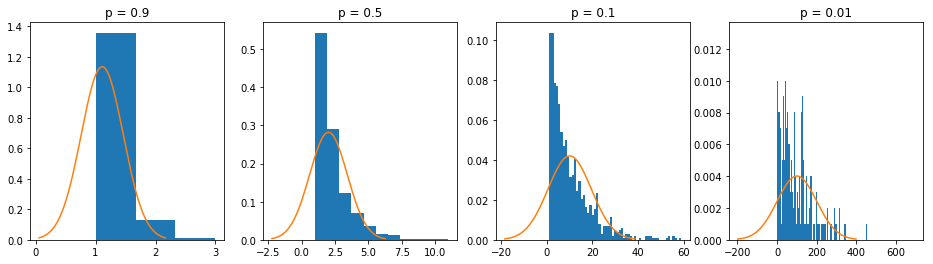

In [4]:
plt.clf()
# Sum of n Geometric(p) vs. Normal PDF

# Generate samples for Binomial function.

p = [0.9, 0.5, 0.1, 0.01]
n = 1000

fig, axes = plt.subplots(ncols=len(p), figsize=(16,4))

for p, ax in zip(p, axes):
    
    mean = 1/p
    
    stddev = np.sqrt((1-p)/(p*p))
    
    samples = np.array([sample_geometric(p) for i in range(n)])
    
    print("Geometric(",p,")")
    print(" Expected mean:   ", mean)
    print(" Actual mean:     ", samples.mean())
    print(" Expected stddev: ", stddev)
    print(" Actual stddev:   ", samples.std())
    
    ax.hist(samples, bins=samples.max(), normed=True)
    
    x = np.linspace(mean - 3*stddev, mean + 3*stddev, num = 1000)
    ax.plot(x, st.norm.pdf(x, loc=mean, scale=stddev))
    
    ax.set_title("p = "+str(p))
    
plt.show()

For the each value of p, I randomly sampled data from the sampling_geometric function. Adjusting my n (# of trials) each time.

For p = 0.01, the samples become approximately normally distributed around n = 1000.

For p = 0.1, the samples become approximately normally distributed around n = 500.

For p = 0.5, the samples become approximately normally distributed around n = 400.

For p = 0.9, the samples become approximately normally distributed around n = 200.